In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = "/Users/wangshuaibo/Library/Containers/com.tencent.xinWeChat/Data/Library/Application Support/com.tencent.xinWeChat/2.0b4.0.9/2cf2d6389aed0359afbaff9cfc00bac7/Message/MessageTemp/9e20f478899dc29eb19741386f9343c8/File/数据_202303061035.csv"

In [3]:
# 读取数据
df = pd.read_csv(file)
df.head()
print("name:{}".format(df["name"].unique()))
df.columns

name:['A3' 'A5' 'A7' 'A8' 'A6' 'AD' 'AF' 'AC' 'AE' 'AL' 'AR' 'AT']


Index(['name', 'temperature1', 'motions', 'time'], dtype='object')

说明：
1. 新栏 12 个耳标，现在只有部分耳标在上报数据，包括
   - A5、A8、A6、AD、AF、AE、AL、AT
   - 截止 2023-3-6 只有 A8、AD、AF、AT 在线
2. A6耳标24日17点开始温度升到 60，截止26日4点恢复正常数值

In [126]:
# 确定猪的耳标名称
pig = "AD"

data = df[df["name"]==pig].copy()
data["Datetime"] = pd.to_datetime(df["time"])

data["Date"] = data["Datetime"].dt.date
data["Time"] = data["Datetime"].dt.time

analys_date = '2023-02-24'
selected_date = pd.to_datetime(analys_date)
result = data.loc[data['Datetime'].dt.date == selected_date.date()]
excel_name = pig+"-"+analys_date+".xlsx"
result.to_excel(excel_name)

In [137]:
first_eat_start_time = time_obj("11:00:00")
first_eat_start_index = result.loc[result['Time'] == first_eat_start_time ].index[0]
first_eat_start_index

1082515

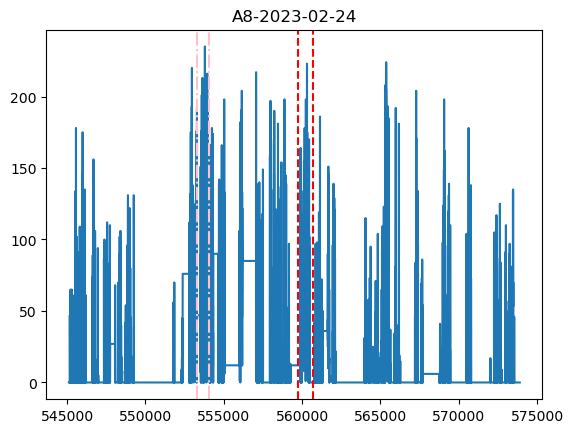

In [69]:
# 绘制数据
fig, ax = plt.subplots(1,1)
result["motions"].plot()

# 第一次吃食物
ax.axvline(x=559734, color='red', linestyle='--')
ax.axvline(x=560712, color='red', linestyle='--')

# 第二次吃食物
ax.axvline(x=554072, color='pink', linestyle='-.')
ax.axvline(x=553272, color='pink', linestyle='-.')

# 增加名称
title_name  = pig + "-" + analys_date
plt.title(title_name)
plt.savefig(title_name)

In [4]:

def eat_motion_plot(pig, analys_date, first_eat_start_time, first_eat_end_time,second_eat_start_time,second_eat_end_time):
    # 确定猪的耳标名称
    #pig = "A8"

    data = df[df["name"]==pig].copy()
    data["Datetime"] = pd.to_datetime(df["time"])

    data["Date"] = data["Datetime"].dt.date
    data["Time"] = data["Datetime"].dt.time

    # analys_date = '2023-02-24'
    selected_date = pd.to_datetime(analys_date)
    result = data.loc[data['Datetime'].dt.date == selected_date.date()]
   

    # 计算时间对应的索引
    first_eat_start_index = result.loc[result['Time'] == first_eat_start_time].index.tolist()[0]
    first_eat_end_index = result.loc[result['Time'] == first_eat_end_time].index[0]
    second_eat_start_index = result.loc[result['Time'] == second_eat_start_time].index[0]
    second_eat_end_index = result.loc[result['Time'] == second_eat_end_time].index[0]

    # 绘制数据
    fig, ax = plt.subplots(1,1)
    result["motions"].plot()
    # 第一次吃食物
    ax.axvline(x=first_eat_start_index, color='red', linestyle='--')
    ax.axvline(x=first_eat_end_index, color='red', linestyle='--')

    # 第二次吃食物
    ax.axvline(x=second_eat_start_index, color='pink', linestyle='-.')
    ax.axvline(x=second_eat_end_index,color='pink', linestyle='-.')

    # 增加名称
    title_name  = pig + "-" + analys_date
    plt.title(title_name)
    plt.savefig(title_name)
    plt.close()

In [5]:
import datetime
def time_obj(time_str):
    datetime_obj = datetime.datetime.strptime(time_str, "%H:%M:%S")
    time_obj = datetime_obj.time()
    return time_obj

In [145]:
first_eat_start_time = time_obj("11:00:00")
first_eat_end_time = time_obj("11:48:00")
second_eat_start_time = time_obj("16:32:00")
second_eat_end_time = time_obj("17:12:00")


pig_ls = ['A3','A5','A7','A8','A6','AD','AF','AC','AE','AL','AR','AT']

for pig in pig_ls:
    eat_motion_plot(pig, '2023-02-25', first_eat_start_time, first_eat_end_time,second_eat_start_time,second_eat_end_time)

In [ ]:
# 第一版代码
def eat_motion_plot(pig, analys_date, *eat_times):
    """
    绘制猪的运动数据和吃食物时间段的图表。

    参数：
    pig (str): 猪的耳标名称
    analys_date (str): 分析日期，格式为 'YYYY-MM-DD'
    *eat_times (str): 吃食物的时间，可以有多个

    返回：
    无返回值，但会保存图表

    示例：
    >>> eat_motion_plot("A8", "2023-02-24", "08:00:00", "10:00:00", "14:00:00", "16:00:00")
    """

    # 确定猪的耳标名称
    #pig = "A8"

    data = df[df["name"]==pig].copy()
    data["Datetime"] = pd.to_datetime(df["time"])

    data["Date"] = data["Datetime"].dt.date
    data["Time"] = data["Datetime"].dt.time

    # analys_date = '2023-02-24'
    selected_date = pd.to_datetime(analys_date)
    result = data.loc[data['Datetime'].dt.date == selected_date.date()]

    # 计算时间对应的索引
    indices = [result.loc[result['Time'] == t].index[0] for t in eat_times]

    # 绘制数据
    fig, ax = plt.subplots(1,1)
    result["motions"].plot()

    # 绘制吃食物的时间段
    colors = ['red', 'pink']
    linestyles = ['--', '-.']
    for i, idx in enumerate(indices):
        ax.axvline(x=idx, color=colors[i], linestyle=linestyles[i])
    
    # 增加名称
    title_name  = pig + "-" + analys_date
    plt.title(title_name)
    plt.savefig(title_name)
    plt.close()

In [ ]:
# 将字符串的时间，转换为Datatime 格式时间
import datetime
def time_obj(time_str):
    datetime_obj = datetime.datetime.strptime(time_str, "%H:%M:%S")
    time_obj = datetime_obj.time()
    return time_obj

In [146]:
for pig in pig_ls:
    eat_motion_plot(pig, '2023-02-24', first_eat_start_time, first_eat_end_time,second_eat_start_time,second_eat_end_time)